In [ ]:
#데이터 연동
# from google.colab import drive
# drive.mount ("/content/drive")

In [ ]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)   # 결과물로 보여주는 열 갯수 최대화
pd.set_option('display.max_rows', None)      # 결과물로 보여주는 행 갯수 최대화

df = pd.read_csv("/content/drive/MyDrive/data-analysis/data-csv/df2000.csv")

print(df.info())
print("행 개수: " , df.shape[0])
print(df.head(5))

<ipython-input-29-86f6fecb7cef>:7: DtypeWarning: Columns (5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/drive/MyDrive/data-analysis/data-csv/df2000.csv")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1018001 entries, 0 to 1018000
Data columns (total 9 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   지역코드    1018001 non-null  int64  
 1   법정동     1018001 non-null  object 
 2   거래일     1018001 non-null  object 
 3   아파트     1018001 non-null  object 
 4   지번      1017907 non-null  object 
 5   전용면적    1017980 non-null  object 
 6   층       1017990 non-null  object 
 7   건축년도    1017985 non-null  float64
 8   거래금액    1018000 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 69.9+ MB
None
행 개수:  1018001
    지역코드     법정동              거래일           아파트      지번     전용면적     층  \
0  41360     호평동  2018-03-10 0:00  호평마을중흥에스-클래스     616  84.7681  12.0   
1  45113   팔복동2가  2016-03-05 0:00       팔복동남양임대   130-2     49.5  10.0   
2  11560  영등포동8가  2015-07-23 0:00            삼환    76-1    84.87   3.0   
3  31200     상안동  2017-04-15 0:00     쌍용아진그린타운2   381-1    59.98   8.0   
4  282

In [ ]:
# '거래금액' 변수의 데이터 타입 출력
price_dtype = df['거래금액'].dtype

# '거래금액' 변수의 결측값 개수 출력
price_missing = df['거래금액'].isnull().sum()

# 결측값 확인
missing_values = df[df['거래금액'].isnull()]

print("거래금액 변수의 데이터 타입:", price_dtype)
print("거래금액 변수의 결측값 개수:", price_missing)
print(missing_values)

#결측값 삭제
df.dropna(subset=['거래금액'], inplace=True)

price_missing2 = df['거래금액'].isnull().sum()
print("삭제 후 거래금액 변수의 결측값 개수:", price_missing2)

거래금액 변수의 데이터 타입: float64
거래금액 변수의 결측값 개수: 1
         지역코드  법정동              거래일     아파트   지번     전용면적    층    건축년도  거래금액
782527  30200  관평동  2023-04-27 0:00  중앙하이츠빌  668  84.9548  5.0  2006.0   NaN
삭제 후 거래금액 변수의 결측값 개수: 0


In [ ]:
#'층' 을 float64으로 변환
df['층'] = pd.to_numeric(df['층'], errors='coerce')

#'전용면적' 을 float64으로 변환
df['전용면적'] = pd.to_numeric(df['전용면적'], errors='coerce')

#'거래일' 중 월(month) 만 추출하여 float64으로 변환
df['거래일'] = pd.to_datetime(df['거래일'], errors='coerce')
df['거래일'] = df['거래일'].dt.month.astype('float64')

print(df.dtypes)

# NaN 개수 확인
print(df['층'].isna().sum())
print(df['전용면적'].isna().sum())
print(df['거래일'].isna().sum())

# 바뀐 형식 확인
print(df.head(5))

지역코드      int64
법정동      object
거래일     float64
아파트      object
지번       object
전용면적    float64
층       float64
건축년도    float64
거래금액    float64
dtype: object
16
25
0
    지역코드     법정동  거래일           아파트      지번     전용면적     층    건축년도     거래금액
0  41360     호평동  3.0  호평마을중흥에스-클래스     616  84.7681  12.0  2005.0  27800.0
1  45113   팔복동2가  3.0       팔복동남양임대   130-2  49.5000  10.0  1999.0   7180.0
2  11560  영등포동8가  7.0            삼환    76-1  84.8700   3.0  1999.0  45000.0
3  31200     상안동  4.0     쌍용아진그린타운2   381-1  59.9800   8.0  1996.0  16400.0
4  28260     석남동  7.0            태화  109-55  73.7900  11.0  1990.0  16000.0


In [ ]:
# 범주형 변수를 cols1에 저장
cols1 = ['지역코드', '법정동']

# cols1에 해당하는 변수들의 결측값 개수 출력
print(df[cols1].isnull().sum())

# cols1에 해당하는 변수들의 데이터 타입 출력
print(df[cols1].dtypes)

# 지역코드 열의 고유한 값의 개수 출력
num_unique_region_codes = df['지역코드'].nunique()
print("지역코드의 총 개수:", num_unique_region_codes)

# 법정동 열의 고유한 값의 개수 출력
num_unique_districts = df['법정동'].nunique()
print("법정동의 총 개수:", num_unique_districts)

num_unique_parcel_numbers = df['지번'].nunique()
print("지번의 총 개수:", num_unique_parcel_numbers)

지역코드    0
법정동     0
dtype: int64
지역코드     int64
법정동     object
dtype: object
지역코드의 총 개수: 248
법정동의 총 개수: 3170
지번의 총 개수: 16963


In [ ]:
# Drop the '아파트' and '지번' columns
df.drop(['아파트', '법정동', '지번'], axis=1, inplace=True)

# Verify that the columns are removed
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1018000 entries, 0 to 1018000
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   지역코드    1018000 non-null  int64  
 1   거래일     1018000 non-null  float64
 2   전용면적    1017975 non-null  float64
 3   층       1017984 non-null  float64
 4   건축년도    1017984 non-null  float64
 5   거래금액    1018000 non-null  float64
dtypes: float64(5), int64(1)
memory usage: 54.4 MB
None


In [ ]:
# 구간 변수를 cols에 저장
cols = ['층', '전용면적', '거래일']

# 구간(interval) 변수의 요약통계 구하기
df[cols].describe()

,층,전용면적,거래일
count,1.017984e+06,1.017975e+06,1.018000e+06
mean,9.152427e+00,7.534987e+01,6.177986e+00
std,6.316726e+00,2.608763e+01,3.289395e+00
min,-4.000000e+00,1.015600e+01,1.000000e+00
25%,4.000000e+00,5.971000e+01,3.000000e+00
50%,8.000000e+00,7.673500e+01,6.000000e+00
75%,1.300000e+01,8.496000e+01,9.000000e+00
max,8.300000e+01,3.950600e+02,1.200000e+01


In [ ]:
# 각 구간 변수들의 왜도(skewness) 계산
df[cols].skew()

층       1.198234
전용면적    1.085585
거래일     0.135529
dtype: float64

In [ ]:
# 각 구간 변수들의 첨도(kurtosis) 계산
df[cols].kurtosis()

층       3.015979
전용면적    2.888163
거래일    -1.127196
dtype: float64

In [ ]:
# '지역코드' 변수의 값별 개수 확인 (결측값 포함)
df['지역코드'].value_counts(dropna=False)

지역코드
41590    22972
41360    17592
41190    16337
41570    13565
44133    13206
48250    13192
41465    13056
11350    12552
41463    12490
41390    12470
30170    12027
27290    11640
47190    11580
41220    11232
42130    10941
41281    10727
48330    10708
41287    10374
28237    10353
36110    10330
28260    10307
29170    10066
44200    10055
28200    10021
41480     9896
29200     9842
30200     9705
45111     9625
41135     9459
45113     9435
26350     9379
41117     9195
41150     8853
31140     8853
28185     8829
41113     8610
27230     8548
11710     8480
48170     8474
41173     8347
46150     8216
41410     8096
11500     8053
48123     8000
47113     7691
42110     7502
11680     7501
43113     7447
27260     7432
44131     7334
45140     7215
45130     7180
41210     7174
26230     7144
41111     6980
11740     6903
29140     6886
41273     6879
11530     6679
28245     6678
11290     6648
41630     6550
47290     6538
26380     6368
46230     6292
46130     6287
26320

In [ ]:
# '지역코드' 변수를 기준으로 한 frequency table 생성 (개수 기준)
pd.crosstab(df['지역코드'], columns='count')

col_0,count
지역코드,
11110,1051
11140,1707
11170,2693
11200,4910
11215,2607
11230,4698
11260,4046
11290,6648
11305,2651


In [ ]:
# '지역코드' 변수를 기준으로 한 frequency table 생성 (비율 기준)
pd.crosstab(df['지역코드'], columns='ratio', normalize=True)

col_0,ratio
지역코드,
11110,0.001032
11140,0.001677
11170,0.002645
11200,0.004823
11215,0.002561
11230,0.004615
11260,0.003974
11290,0.006530
11305,0.002604


In [ ]:
# 데이터프레임에서 세 가지 변수의 1사분위수(Q1)를 계산
Q1 = df[['층', '전용면적', '거래일']].quantile(0.25)

# 데이터프레임에서 세 가지 변수의 3사분위수(Q3)를 계산
Q3 = df[['층', '전용면적', '거래일']].quantile(0.75)

# 사분위수 범위(IQR)를 계산합니다. IQR은 Q3에서 Q1을 뺀 값으로서, 데이터의 중간 50%의 범위를 나타냄
IQR = Q3 - Q1

print(IQR)

층        9.00
전용면적    25.25
거래일      6.00
dtype: float64


In [ ]:
# 이상치를 식별하기 위해 사분위수 범위를 사용하여 하한값(Lower)을 계산
Lower = Q1 - 3.0 * IQR

# 이상치를 식별하기 위해 사분위수 범위를 사용하여 상한값(Upper)을 계산
Upper = Q3 + 3.0 * IQR

print(Lower)
print(Upper)

층      -23.00
전용면적   -16.04
거래일    -15.00
dtype: float64
층        40.00
전용면적    160.71
거래일      27.00
dtype: float64


In [ ]:
# 이상치를 제거하는 함수 정의
def remove_outliers(df, cols):
    Q1 = df[cols].quantile(0.25)  # 1사분위수
    Q3 = df[cols].quantile(0.75)  # 3사분위수
    IQR = Q3 - Q1  # 사분위수 범위

    # 이상치를 식별하기 위한 하한값(Lower) 및 상한값(Upper) 계산
    Lower = Q1 - 3.0 * IQR
    Upper = Q3 + 3.0 * IQR

    # 이상치를 제거한 데이터프레임 반환
    return df[~((df[cols] < Lower) | (df[cols] > Upper)).any(axis=1)]

# 이상치 제거 적용
df_cleaned = remove_outliers(df, ['층', '전용면적', '거래일'])

# 결과 확인
print("이상치 제거 후 데이터프레임 크기:", df_cleaned.shape)

이상치 제거 후 데이터프레임 크기: (1007127, 6)


In [ ]:
# 구간 변수를 cols 리스트에 저장
cols = ['층', '전용면적', '거래일']

# 주어진 변수들 간의 상관계수를 계산
correlation_matrix = df[cols].corr()

# 상관계수 행렬을 소수점 둘째 자리까지 반올림하여 표시
rounded_correlation_matrix = round(correlation_matrix, 2)

print(rounded_correlation_matrix)

         층  전용면적   거래일
층     1.00  0.16  0.01
전용면적  0.16  1.00  0.02
거래일   0.01  0.02  1.00


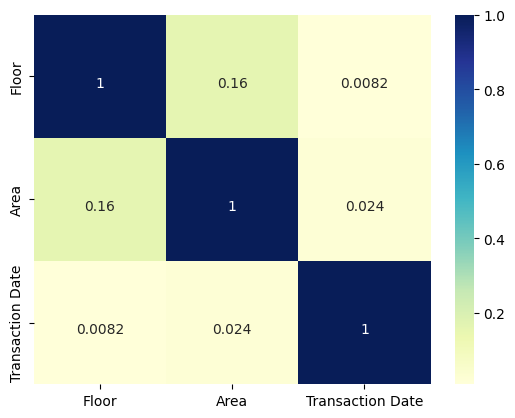

<class 'pandas.core.frame.DataFrame'>
Index: 1018000 entries, 0 to 1018000
Data columns (total 6 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Region Code        1018000 non-null  int64  
 1   Transaction Date   1018000 non-null  float64
 2   Area               1017975 non-null  float64
 3   Floor              1017984 non-null  float64
 4   Construction Year  1017984 non-null  float64
 5   Price              1018000 non-null  float64
dtypes: float64(5), int64(1)
memory usage: 54.4 MB


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# map 한글 깨짐으로 영어로 칼럼명 변경
# rename 함수를 사용하여 칼럼명 변경
df = df.rename(columns={'지역코드': 'Region Code',  '거래일': 'Transaction Date', '전용면적': 'Area',  '층': 'Floor', '건축년도': 'Construction Year', '거래금액': 'Price'})
cols = ['Floor', 'Area', 'Transaction Date']

# 주어진 변수들 간의 상관계수를 계산
corr = df[cols].corr()

# heatmap을 그리기 위한 추가적인 옵션으로, 히트맵 안에 상관계수 값을 표시할 때의 텍스트 정렬을 설정
# 텍스트의 가로 정렬이 중앙에 위치
# 텍스트의 세로 정렬이 상단에 위치
annot_kws = {"ha": 'center', "va": 'top'}

# seaborn 라이브러리의 heatmap 함수를 사용하여 상관계수 히트맵
# annot=True로 설정하면 상관계수 값을 히트맵 안에 표시합
# annot_kws 옵션으로 표시된 텍스트의 가로 정렬(ha)은 'center'로, 세로 정렬(va)은 'top'으로 설정
# cmap 옵션으로는 컬러맵을 선택할 수 있습니다. 여기서는 'YlGnBu'를 사용합니다.
sns.heatmap(data=corr, annot=True, annot_kws=annot_kws, cmap="YlGnBu")

plt.show()

df.info()

In [ ]:
df = df.rename(columns={'거래금액': 'Price'})

# 거래금액의 중위값을 계산
median_price = df['Price'].median()

# 거래금액이 중위값보다 높으면 1, 낮으면 0으로 하는 이진값 타깃 변수 생성
df['Price_B'] = (df['Price'] > median_price).astype(int)

# 생성된 '거래금액_B'를 타깃 변수로 삼음
target_variable = 'Price_B'



In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1018000 entries, 0 to 1018000
Data columns (total 7 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Region Code        1018000 non-null  int64  
 1   Transaction Date   1018000 non-null  float64
 2   Area               1017975 non-null  float64
 3   Floor              1017984 non-null  float64
 4   Construction Year  1017984 non-null  float64
 5   Price              1018000 non-null  float64
 6   Price_B            1018000 non-null  int64  
dtypes: float64(5), int64(2)
memory usage: 62.1 MB
None


In [ ]:
from scipy import stats

data_1 = df[df['Price_B'] == 1]['Transaction Date']
data_0 = df[df['Price_B'] == 0]['Transaction Date']

# stats.ttest_ind 함수를 사용하여 두 그룹 간의 독립 표본 t-검정을 수행
# 여기서는 '층'이 1인 그룹과 '층'이 0인 그룹 간의 '전용면적' 변수에 대한 t-검정을 수행
# 결과는 t-value와 p-value가 반환
result = stats.ttest_ind(data_1, data_0)

# t-검정의 결과로 나온 p-value를 해석
# 일반적으로 p-value가 0.05보다 작으면 유의미한 차이가 있다고 판단
print(result)

TtestResult(statistic=22.431510385797168, pvalue=2.0642842619687647e-111, df=1017998.0)


In [ ]:
df.dropna(subset=['Area'], inplace=True)

data_1 = df[df['Price_B'] == 1]['Area']
data_0 = df[df['Price_B'] == 0]['Area']

result = stats.ttest_ind(data_1, data_0)
print(result)

TtestResult(statistic=536.6652073054972, pvalue=0.0, df=1017973.0)


In [ ]:
df.dropna(subset=['Floor'], inplace=True)

data_1 = df[df['Price_B'] == 1]['Floor']
data_0 = df[df['Price_B'] == 0]['Floor']

result = stats.ttest_ind(data_1, data_0)
print(result)

TtestResult(statistic=232.1773997791066, pvalue=0.0, df=1017957.0)


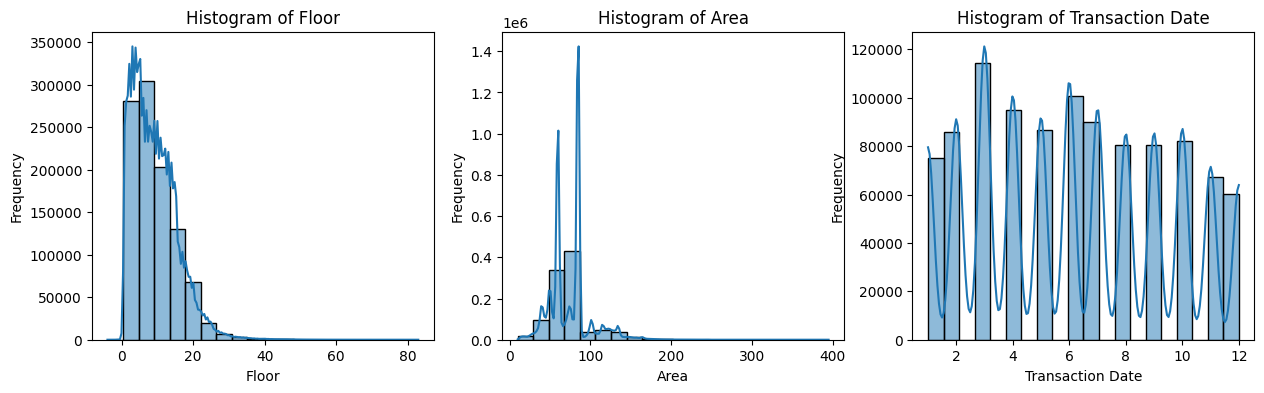

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 각 구간 변수들의 히스토그램 그리기
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

sns.histplot(ax=axes[0], data=df, x="Floor", kde=True, bins=20)
# kde=True는 밀도 그래프를 함께 그릴 것을 나타냄. (밀도 그래프는 히스토그램의 분포를 부드럽게 표현)
# bins=20은 히스토그램의 막대 개수
axes[0].set_title("Histogram of Floor")
axes[0].set_xlabel("Floor")
axes[0].set_ylabel("Frequency")

sns.histplot(ax=axes[1], data=df, x="Area", kde=True, bins=20)
axes[1].set_title("Histogram of Area")
axes[1].set_xlabel("Area")
axes[1].set_ylabel("Frequency")

sns.histplot(ax=axes[2], data=df, x="Transaction Date", kde=True, bins=20)
axes[2].set_title("Histogram of Transaction Date")
axes[2].set_xlabel("Transaction Date")
axes[2].set_ylabel("Frequency")

plt.show()

In [ ]:
# 분석할 범주형 변수들을 리스트에 저장
cols1 = ['Region Code', 'Construction Year']

# 주어진 데이터프레임에서 범주형 변수만 추출하여 새로운 데이터프레임(df1)을 생성
df1 = df[cols1]

In [ ]:
for col in df1.columns:
    print ("")
    print ("---- %s ---" % col)
    print (df[col].value_counts(dropna=False, normalize=True))


---- Region Code ---
Region Code
41590    0.022565
41360    0.017282
41190    0.016049
41570    0.013326
44133    0.012972
48250    0.012959
41465    0.012825
11350    0.012330
41463    0.012270
41390    0.012249
30170    0.011814
27290    0.011435
47190    0.011375
41220    0.011034
42130    0.010748
41281    0.010538
48330    0.010518
41287    0.010191
28237    0.010169
36110    0.010148
28260    0.010125
29170    0.009888
44200    0.009877
28200    0.009843
41480    0.009721
29200    0.009668
30200    0.009534
45111    0.009455
41135    0.009292
45113    0.009269
26350    0.009214
41117    0.009033
41150    0.008697
31140    0.008697
28185    0.008672
41113    0.008457
27230    0.008396
11710    0.008330
48170    0.008325
41173    0.008200
46150    0.008071
41410    0.007953
11500    0.007911
48123    0.007858
47113    0.007555
42110    0.007370
11680    0.007368
43113    0.007316
27260    0.007301
44131    0.007205
45140    0.007088
45130    0.007053
41210    0.007047
26230    0.0

In [ ]:
# One-hot encoding 열들을 리스트로 지정
cols2 = ['Region Code']

# One-hot encoding 수행하고 결과를 새로운 데이터프레임(df100)에 저장
df100 = pd.get_dummies(df, columns=cols2)

# 데이터프레임(df100)의 열 이름을 리스트로 변환하여 출력
list(df100.columns)

In [ ]:
df.drop(['Price'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1017959 entries, 0 to 1018000
Data columns (total 6 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Region Code        1017959 non-null  int64  
 1   Transaction Date   1017959 non-null  float64
 2   Area               1017959 non-null  float64
 3   Floor              1017959 non-null  float64
 4   Construction Year  1017943 non-null  float64
 5   Price_B            1017959 non-null  int64  
dtypes: float64(4), int64(2)
memory usage: 54.4 MB


In [91]:
cols = ['Area','Region Code','Transaction Date','Floor','Construction Year','Price_B']

df[cols] = df[cols].astype('category')   # cols에 저장된 변수들의 dtype을 category로 변경

In [95]:
import imblearn
import graphviz
import pandas as pd
import numpy as np

df.dropna(subset=['Area'], inplace=True)
df.dropna(subset=['Region Code'], inplace=True)
df.dropna(subset=['Transaction Date'], inplace=True)
df.dropna(subset=['Floor'], inplace=True)
df.dropna(subset=['Construction Year'], inplace=True)
df.dropna(subset=['Price_B'], inplace=True)

# dtype을 category로 지정해 줄 변수들을 cols2에 임시 저장
cols2 = ['Region Code', 'Transaction Date', 'Area', 'Floor', 'Construction Year', 'Price_B']

# cols2에 저장된 변수들의 dtype을 category로 변경
df[cols2] = df[cols2].astype('category')

# 타겟변수를 제외한 변수만 data에 저장
data = df.drop(['Price_B'], axis=1)

# 타겟변수만 target에 저장
target = df['Price_B']

# 타겟 변수의 클래스 분포 확인
print(df['Price_B'].value_counts(dropna=False))

# 타겟 변수의 클래스 비율 확인
print(df['Price_B'].value_counts(dropna=False, normalize=True))

from sklearn.model_selection import train_test_split

# train_test_split을 사용하여 데이터 분할
# stratify=target은 타겟 변수의 클래스 비율을 유지하기 위해 사용
X_train, X_test, y_train, y_test = train_test_split(
    data, target, test_size=0.5, random_state=42, stratify=target)

# 데이터 분할 결과 출력
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

# NaN 값을 가진 행을 삭제
X_train = X_train.dropna()
y_train = y_train.dropna()

# 훈련 데이터의 타겟 변수 클래스 비율 확인
print(y_train.value_counts(normalize=True))
print(y_train.value_counts())


Price_B
0    510675
1    507268
Name: count, dtype: int64
Price_B
0    0.501673
1    0.498327
Name: proportion, dtype: float64
X_train shape: (508971, 5)
X_test shape: (508972, 5)
Price_B
0    0.501673
1    0.498327
Name: proportion, dtype: float64
Price_B
0    255337
1    253634
Name: count, dtype: int64


In [97]:
# Logistic Regression 모형 (Default 모델)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression(solver='lbfgs',penalty='none',random_state=0,n_jobs=-1)
model = lr.fit(X_train, y_train)
pred = model.predict(X_test)

print ("Logreg Training set score:{:.5f}".format(model.score(X_train, y_train)))
print ("Logreg Test set score:{:.5f}".format(accuracy_score(y_test, pred)))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


Logreg Training set score:0.76761
Logreg Test set score:0.76689


In [98]:
# Logistic Regression 모형 (Default 모델)
lr = LogisticRegression(solver='lbfgs',penalty='none',random_state=0,n_jobs=-1)

# 그리드 서치
from sklearn.model_selection import GridSearchCV
params = {'solver':['lbfgs', 'saga'], 'penalty':['none']}

grid_lr = GridSearchCV(lr, param_grid=params, scoring='accuracy', cv=5, n_jobs=-1,)
grid_lr.fit(X_train, y_train)

print("GridSearchCV max accuracy:{:.5f}".format(grid_lr.best_score_))
print("GridSearchCV best parameter:", (grid_lr.best_params_))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


GridSearchCV max accuracy:0.78162
GridSearchCV best parameter: {'penalty': 'none', 'solver': 'saga'}


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [99]:
best_clf = grid_lr.best_estimator_
pred = best_clf.predict(X_test)
print("Accuracy on test set:{:.5f}".format(accuracy_score(y_test, pred)))

Accuracy on test set:0.78058


In [100]:
# 변수명을 Index로 만들고 coefficient값을 매칭한 데이터프레임 만들기

feature_names = list(data.columns)   # 변수명(컬럼명)을 리스트 형태로 만들기
dft = pd.DataFrame(np.round(best_clf.coef_, 3).transpose(), index=feature_names,
                   columns=['coef'])
dft1 = dft.sort_values(by='coef', ascending=True)   # 컬럼 coef의 값들을 오름차순으로 정리
dft1

,coef
Construction Year,-0.001
Region Code,-0.000
Transaction Date,0.001
Floor,0.017
Area,0.056


In [101]:
# 변수명을 Index로 만들고 coefficient값을 제곱한 Odds ratio값을 Index에 매칭한 데이터프레임 만들기

feature_names = list(data.columns)   # 변수명(컬럼명)을 리스트 형태로 만들기
dft = pd.DataFrame(np.round(np.exp(best_clf.coef_),3).transpose(), index=feature_names,
                   columns=['Odds_ratio'])
dft1 = dft.sort_values(by='Odds_ratio', ascending=False)   # 컬럼 coef의 값들을 내림차순으로 정리
dft1

,Odds_ratio
Area,1.057
Floor,1.017
Transaction Date,1.001
Region Code,1.000
Construction Year,0.999


In [102]:
# 구간 변수들만 별도로 모아 데이터프레임 df_num을 만든다.
numeric_cols = ['Area','Transaction Date','Floor']
df_num = df[numeric_cols]

# StandardScaler( )로 데이터 스케일 표준화를 실행하고 결과를 데이터프레임으로 만든다.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_num_standard = pd.DataFrame(scaler.fit_transform(df_num))

# StandardScaler( )는 변수명을 지우므로, 새로 만든 데이터프레임에 다시 변수명을 넣는다.
df_num_standard.columns = df_num.columns
df_num_standard.head()

,Area,Transaction Date,Floor
0,0.361024,-0.966133,0.450795
1,-0.990876,-0.966133,0.134176
2,0.364930,0.249897,-0.973992
3,-0.589156,-0.662126,-0.182444
4,-0.059790,0.249897,0.292486


In [ ]:
df_cat = df.drop(numeric_cols, axis=1) # 원래 데이터프레임 df에서 구간변수들을 제거하여 df_cat에 저장

In [ ]:
# 구간변수 스케일을 표준화한 df_num_standard와 범주형 변수만 담은 df_cat을 병합
dfu_standard = pd.concat([df_num_standard, df_cat], axis=1)
dfu_standard.columns   # dfu의 변수명을 나열

In [ ]:
dfu_standard.to_csv('/content/drive/MyDrive/data-analysis/data-csv/apart-standard.csv', index=False)  # 병합한 데이터프레임을 csv 형태로 저장

In [ ]:
data = dfu_standard.drop(['Price_B'], axis=1)   # 타겟변수를 제외한 변수만 data에 저장
target = dfu_standard['Price_B']                # 타겟변수만 target에 저장

from imblearn.under_sampling import RandomUnderSampler    # RandomUnderSampler를 import
undersample = RandomUnderSampler(sampling_strategy=0.333, random_state=2)
                                                          # 타겟변수의 소수 클래스 및 다수 클래스를
                                                          # 1:3의 비율(=1/3)로 언더샘플링
data_under, target_under = undersample.fit_resample(data, target)
                                                          # data 및 target에 언더샘플링 적용

In [ ]:
# 50:50 데이터 분할
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    data_under, target_under, test_size=0.5, random_state=42, stratify=target_under)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)